In [18]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


# Exploring the data

In [6]:


fashon_mnist = keras.datasets.fashion_mnist

(train_images , train_labels),(test_images, test_labels)= fashon_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_images)

60000

In [10]:
len(train_labels)

60000

In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
train_labels.shape

(60000,)

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
len(test_images)

10000

In [15]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [16]:
len(test_labels)

10000

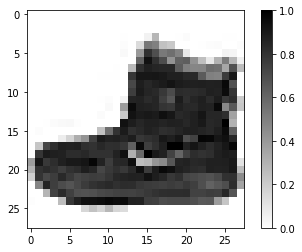

In [24]:
# data without preprocessing
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [20]:
#processing the data

train_images = train_images/255
test_images = test_images/255

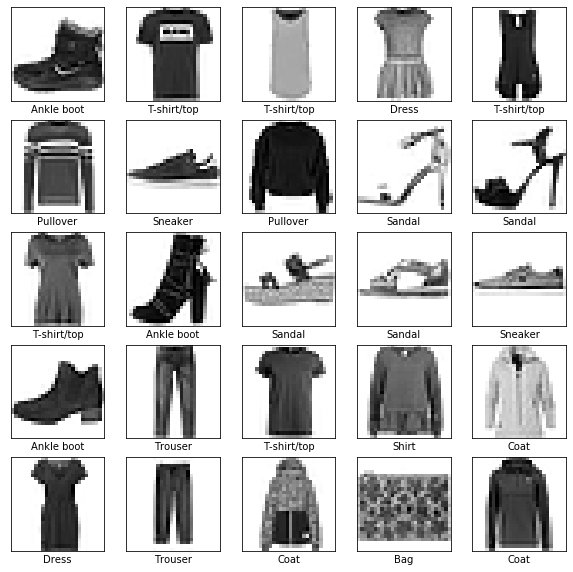

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [25]:
#buliding a model 

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128,activation= 'relu'),
    keras.layers.Dense(10)
    
])

In [26]:
model.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(from_logits= True),
              metrics=['accuracy']
             )

In [27]:
model.fit(train_images,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4994 - accuracy: 0.8248s - loss: 0.5
Epoch 2/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3716 - accuracy: 0.8652
Epoch 3/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3336 - accuracy: 0.8790
Epoch 4/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3093 - accuracy: 0.8873
Epoch 5/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2896 - accuracy: 0.8932
Epoch 6/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2765 - accuracy: 0.8978
Epoch 7/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2639 - accuracy: 0.9011s - loss: 0.264
Epoch 8/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2534 - accuracy: 0.9050
Epoch 9/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2453 - acc

In [29]:
test_loss , test_acc = model.evaluate(test_images,test_labels,verbose=2)

print('\n test accuracy = ',test_acc)

10000/10000 - 0s - loss: 0.3210 - accuracy: 0.8893

 test accuracy =  0.8893


# probablity model

In [30]:
prob_model = tf.keras.Sequential([model,
                                 tf.keras.layers.Softmax()])

In [31]:
predictions = prob_model.predict(test_images)

In [32]:
predictions[0]

array([2.6629092e-09, 4.1568541e-07, 3.1599291e-07, 4.2517778e-10,
       6.7147461e-09, 4.5164721e-04, 1.2401371e-07, 1.1655525e-02,
       4.8527340e-08, 9.8789203e-01], dtype=float32)

In [33]:
np.argmax(predictions[0])

9

In [34]:
test_labels[0]

9

In [35]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

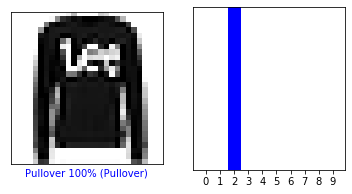

In [37]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

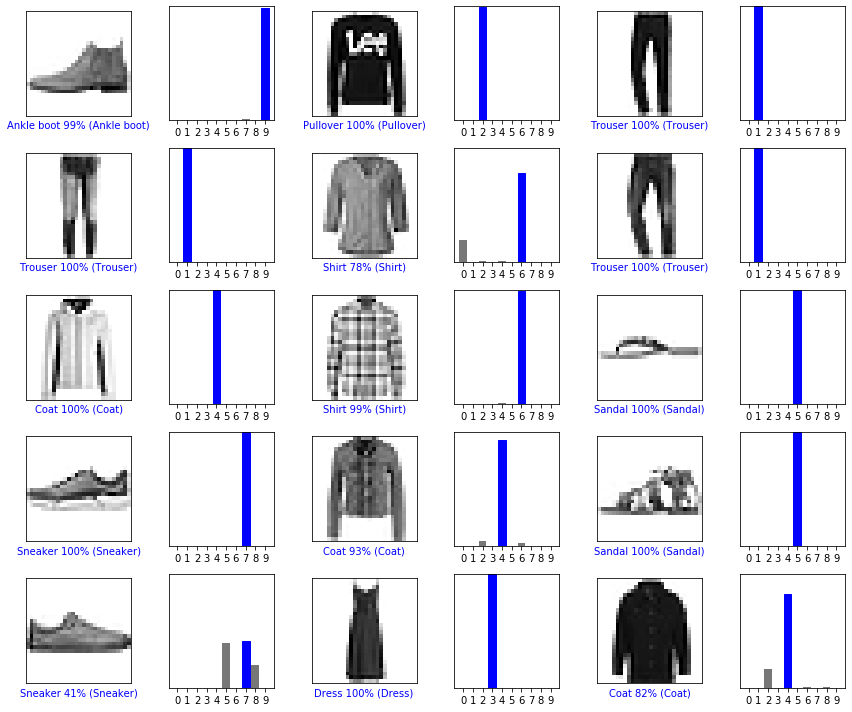

In [38]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()